In [1]:
from PIL import Image
from PIL import ImageOps

import os

img_root = 'Waste/dataset'

In [2]:
def resize_img(path, width, height, save_by_same_path=False)-> Image:
    img = Image.open(path)
    resized_img = img.resize((width, height))
    if save_by_same_path:
        resized_img.save(path)
    return resized_img

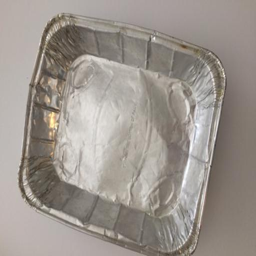

In [3]:
resized_img = resize_img('metal5.jpg', 256, 256, save_by_same_path=False)
resized_img

In [4]:
def get_dataset_stats(img_root)-> dict:
    img_stats = {}
    for waste_type in os.listdir(img_root):
        if '.' not in waste_type:
            img_stats[waste_type] = len(os.listdir(os.path.join(img_root, waste_type)))
    return img_stats

In [5]:
get_dataset_stats(img_root)

{'paper': 506,
 'bio': 78,
 'alu_cover': 59,
 'plastic_package': 578,
 'plastic_other': 72,
 'alu_can': 43,
 'metal': 45,
 'cardboard': 25,
 'plastic_transparent': 282,
 'trash': 20,
 'tablet_blister': 216,
 'tetra_pak': 66,
 'glass': 52,
 'plastic_cup': 118,
 'polystyrene': 17,
 'pet': 41,
 'paper_cup': 13,
 'dirty': 53,
 'check': 151}

In [6]:
def remove_DS_Store(img_root)-> None:
    for waste_type in os.listdir(img_root):
        if waste_type == ".DS_Store":
            os.remove(os.path.join(img_root, ".DS_Store"))
        elif os.path.isdir(os.path.join(img_root, waste_type)):
            file_names = os.listdir(os.path.join(img_root, waste_type))
            if ".DS_Store" not in file_names:
                continue
            else:
                os.remove(os.path.join(img_root, waste_type, ".DS_Store"))

In [7]:
remove_DS_Store(img_root)

In [8]:
def resize_all_images(img_root, width=512, height=512)-> None:
    for waste_type in os.listdir(img_root):
        if os.path.isdir(os.path.join(img_root, waste_type)):
            print(waste_type)
            file_names = os.listdir(os.path.join(img_root, waste_type))
            for file_name in file_names:
                full_image_name = os.path.join(img_root, waste_type, file_name)
                resize_img(full_image_name, width, height, save_by_same_path=True)

In [9]:
resize_all_images(img_root)

paper
bio
alu_cover
plastic_package
plastic_other
alu_can
metal
cardboard
plastic_transparent
trash
tablet_blister
tetra_pak
glass
plastic_cup
polystyrene
pet
paper_cup
dirty
check


In [10]:
def get_img_name(dataset_identifier, waste_type, file_identifier):
    file_identifier = (4 - len(str(file_identifier)))*'0' + str(file_identifier)
#     current_identifier = file_name.split("_")[-1].split('.')[0]
#     file_identifier = (4 - len(str(current_identifier)))*'0' + str(current_identifier)
    return "_".join([
        dataset_identifier, 
        waste_type, 
        file_identifier]) + '.jpg'


def rename_all_images(img_root, dataset_identifier)-> None:
    for waste_type in os.listdir(img_root):
        if os.path.isdir(os.path.join(img_root, waste_type)):
            print(waste_type)
            file_names = os.listdir(os.path.join(img_root, waste_type))
            file_names.sort()
            for file_identifier, file_name in enumerate(file_names):
                if '.' != file_name[0]:
                    new_file_name = get_img_name(dataset_identifier, waste_type, file_identifier)
                    print(file_name, new_file_name)
                    full_image_name = os.path.join(img_root, waste_type, file_name)
#                     os.rename(full_image_name, os.path.join(img_root, waste_type, new_file_name))

In [11]:
rename_all_images(img_root, "0")

paper
0_paper_0001.jpg 0_paper_0000.jpg
0_paper_0002.jpg 0_paper_0001.jpg
0_paper_0003.jpg 0_paper_0002.jpg
0_paper_0004.jpg 0_paper_0003.jpg
0_paper_0005.jpg 0_paper_0004.jpg
0_paper_0006.jpg 0_paper_0005.jpg
0_paper_0007.jpg 0_paper_0006.jpg
0_paper_0008.jpg 0_paper_0007.jpg
0_paper_0009.jpg 0_paper_0008.jpg
0_paper_0010.jpg 0_paper_0009.jpg
0_paper_0011.jpg 0_paper_0010.jpg
0_paper_0012.jpg 0_paper_0011.jpg
0_paper_0013.jpg 0_paper_0012.jpg
0_paper_0014.jpg 0_paper_0013.jpg
0_paper_0015.jpg 0_paper_0014.jpg
0_paper_0016.jpg 0_paper_0015.jpg
0_paper_0017.jpg 0_paper_0016.jpg
0_paper_0018.jpg 0_paper_0017.jpg
0_paper_0019.jpg 0_paper_0018.jpg
0_paper_0020.jpg 0_paper_0019.jpg
0_paper_0021.jpg 0_paper_0020.jpg
0_paper_0022.jpg 0_paper_0021.jpg
0_paper_0023.jpg 0_paper_0022.jpg
0_paper_0024.jpg 0_paper_0023.jpg
0_paper_0025.jpg 0_paper_0024.jpg
0_paper_0026.jpg 0_paper_0025.jpg
0_paper_0027.jpg 0_paper_0026.jpg
0_paper_0028.jpg 0_paper_0027.jpg
0_paper_0029.jpg 0_paper_0028.jpg
0_paper_

In [13]:
def set_borders(img_root):
    for waste_type in os.listdir(img_root):
        if os.path.isdir(os.path.join(img_root, waste_type)):
            print(waste_type)
            file_names = os.listdir(os.path.join(img_root, waste_type))
            file_names.sort()
            for file_identifier, file_name in enumerate(file_names):
                if '.' != file_name[0]:
                    full_image_name = os.path.join(img_root, waste_type, file_name)
                    img = Image.open(full_image_name)
                    px = img.load()

                    border_width = (512 - img.size[1]) // 2
                    border_color = (208, 210, 223)

                    new_image = ImageOps.expand(img, border=(0, border_width, 0, border_width), fill=border_color)
                    new_image.save(full_image_name)
                
set_borders('dataset_1_without_borders')

paper
bio
alu_cover
plastic_package
plastic_other
alu_can
metal
cardboard
plastic_transparent
trash
tablet_blister
tetra_pak
glass
plastic_cup
polystyrene
pet
paper_cup
dirty
check
